In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image, ImageOps

import io
import os
import scipy.misc
import six
import time

from six import BytesIO

from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import label_map_util

%matplotlib inline

In [2]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
    path: a file path (this can be local or on colossus)

    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    image = Image.open(image_path)
    image = ImageOps.exif_transpose(image)
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Load the COCO Label Map
category_index = {
    1: {'id': 1, 'name': 'word'},
    2: {'id': 2, 'name': 'char'},
    3: {'id': 3, 'name': 'package'},
    4: {'id': 4, 'name': 'logo'},
    5: {'id': 5, 'name': 'title'},
}

In [3]:
start_time = time.time()
tf.keras.backend.clear_session()
detect_fn = tf.saved_model.load('exported-models/text_detection_efficientdet_d2/saved_model')
end_time = time.time()
elapsed_time = end_time - start_time
print('Elapsed time: ' + str(elapsed_time) + 's')

Elapsed time: 19.853467226028442s


Elapsed time: 0.254172682762146 second per image


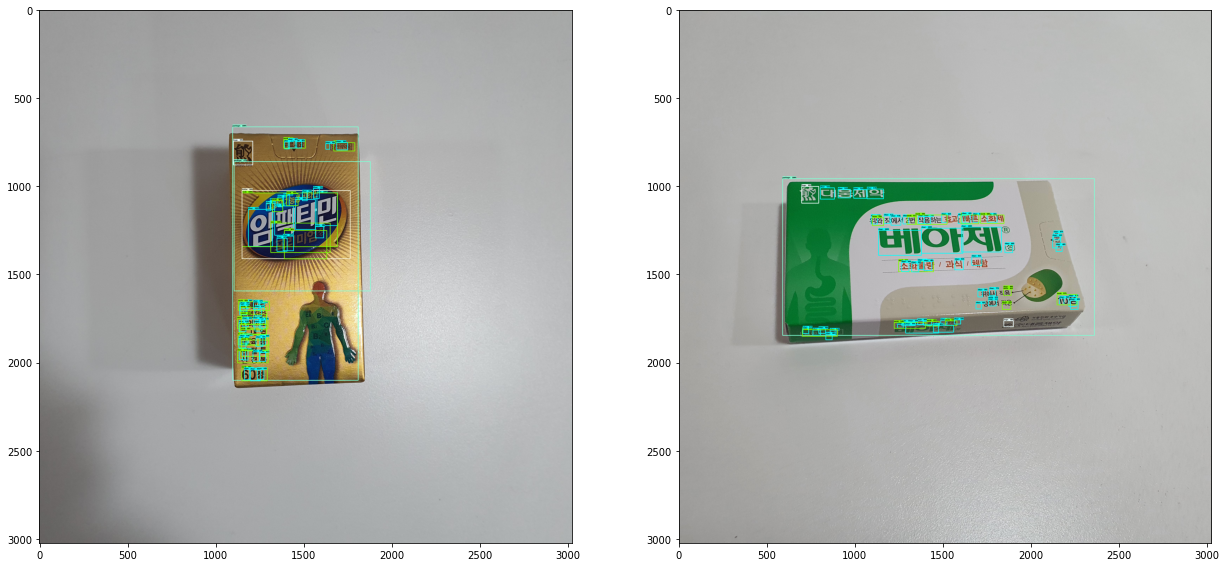

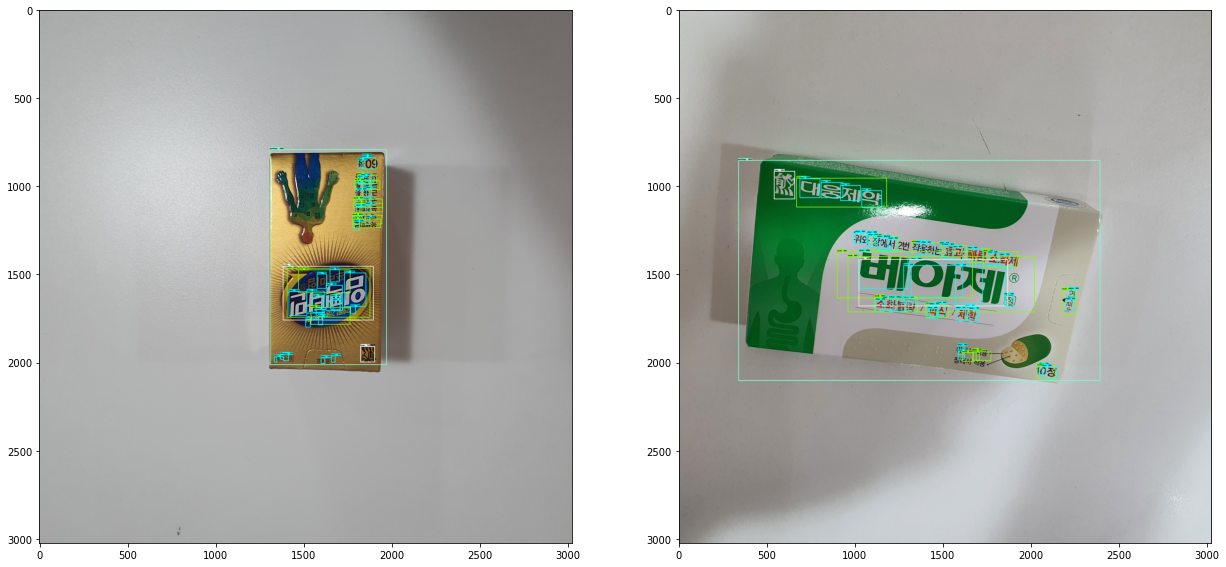

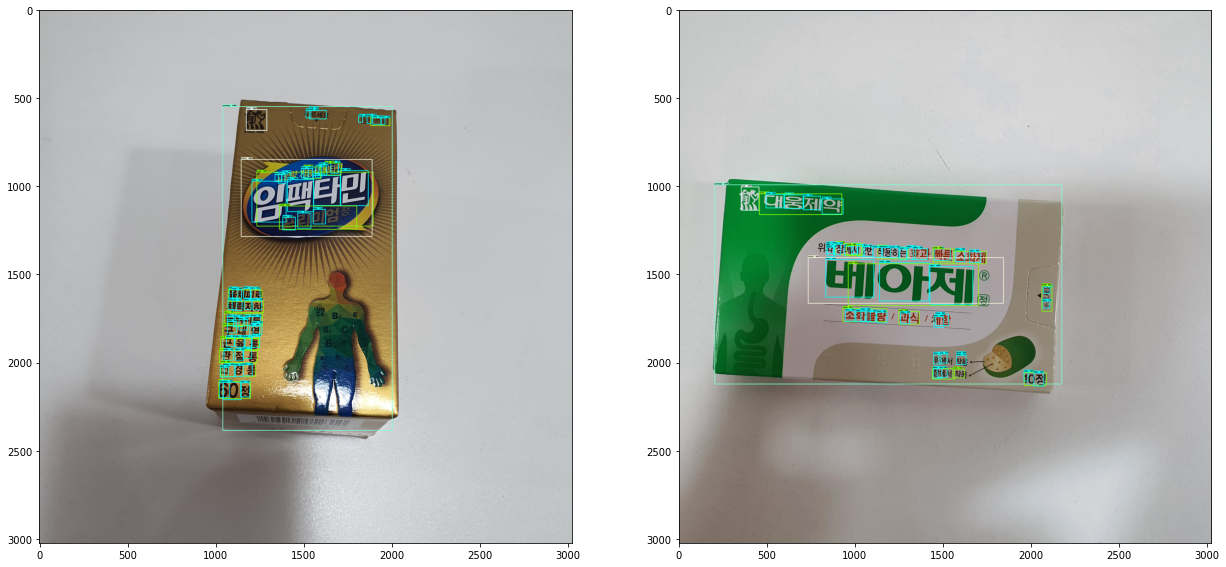

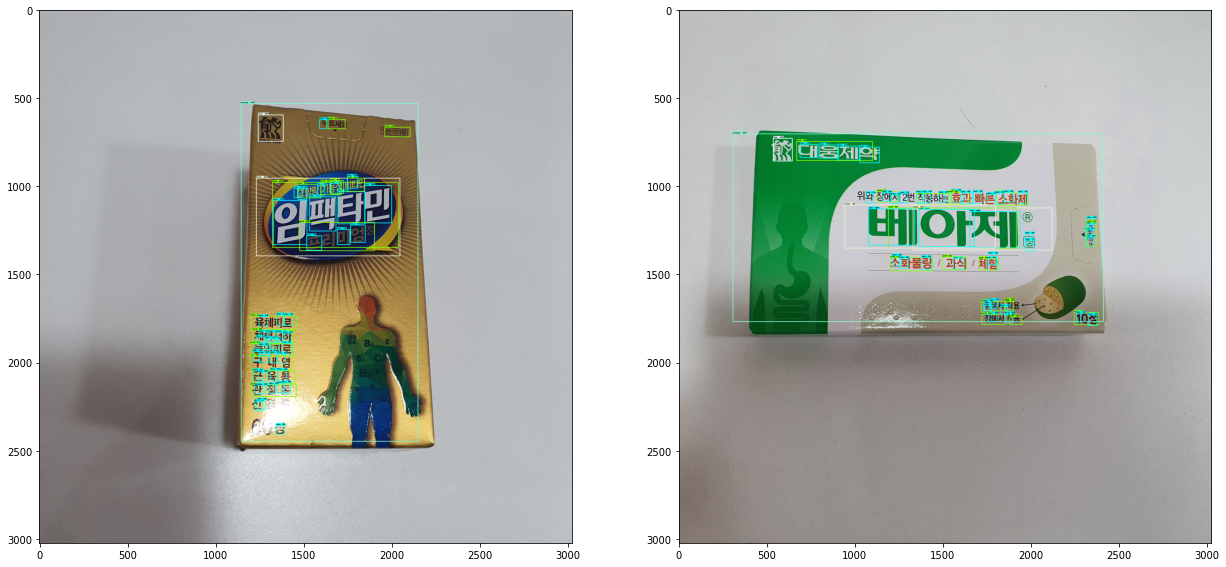

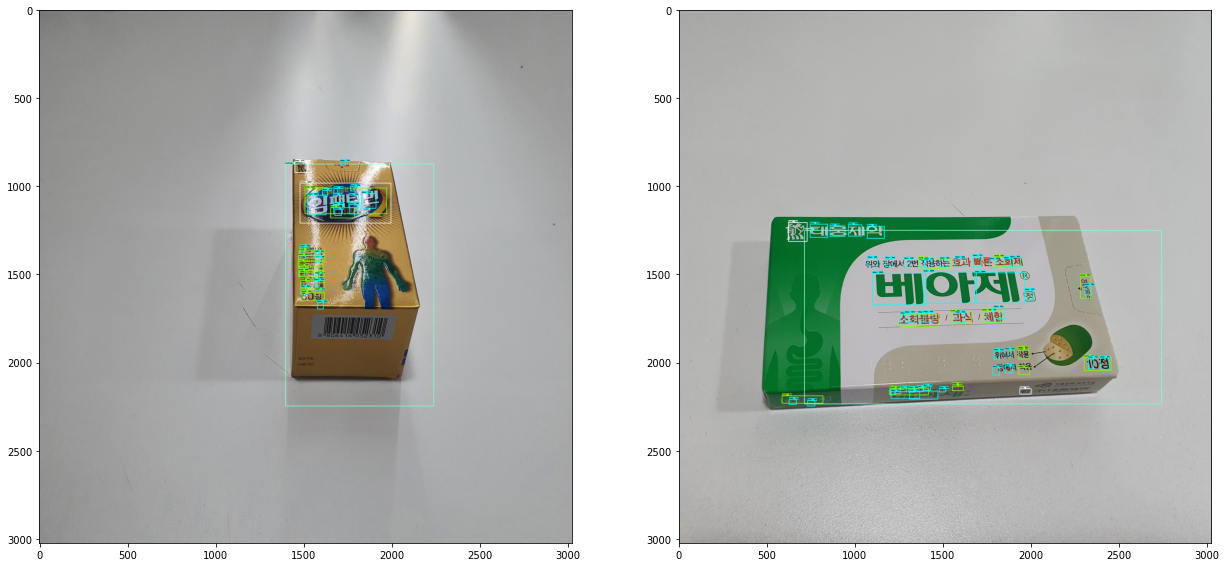

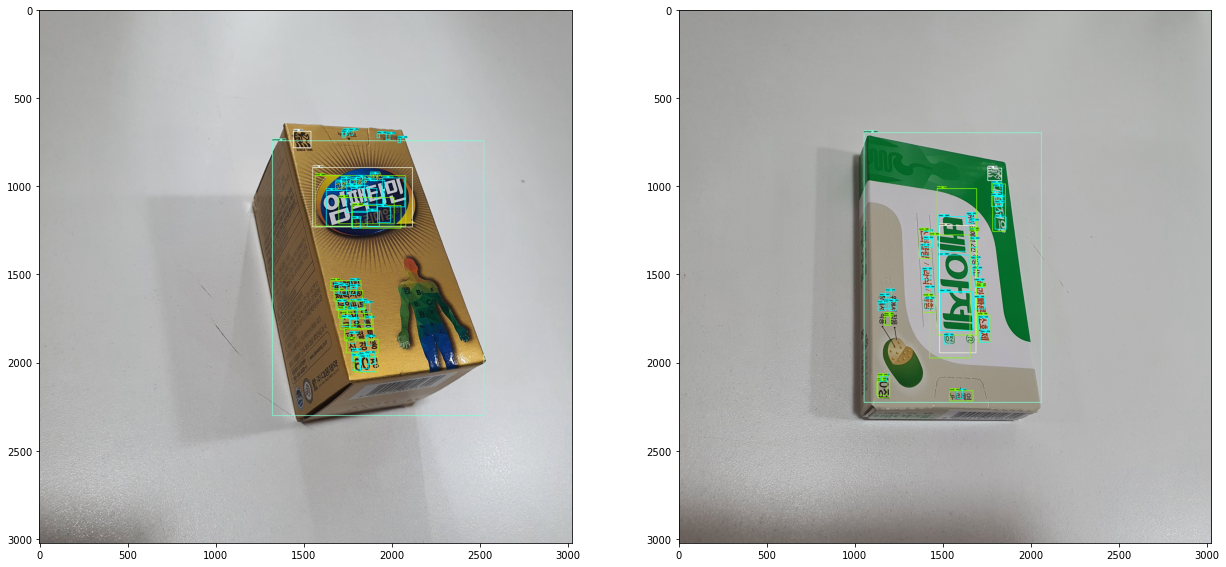

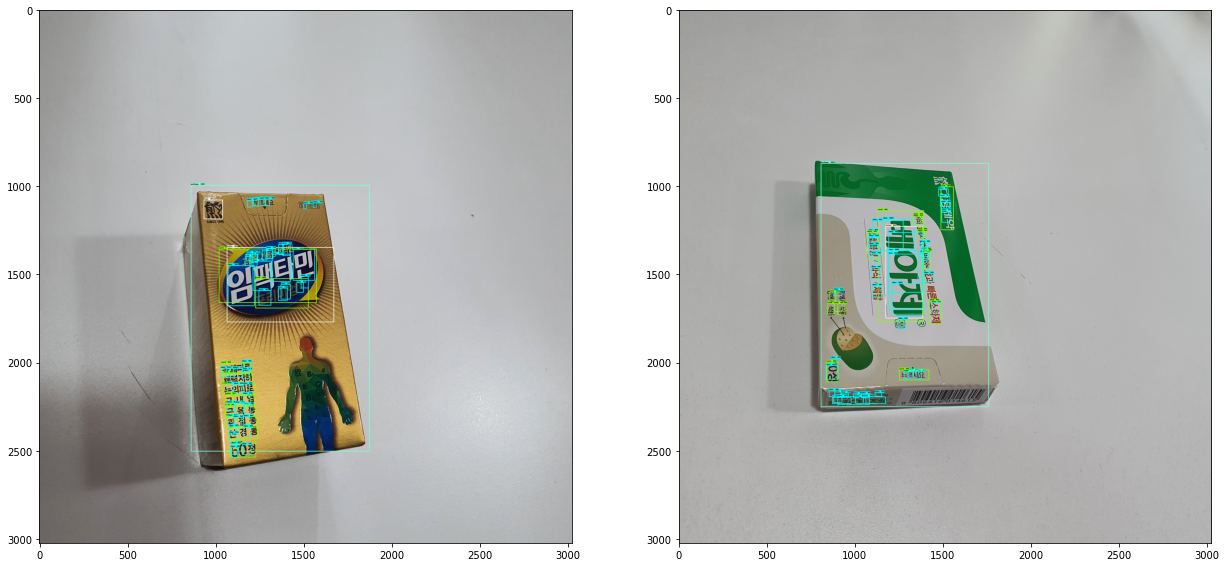

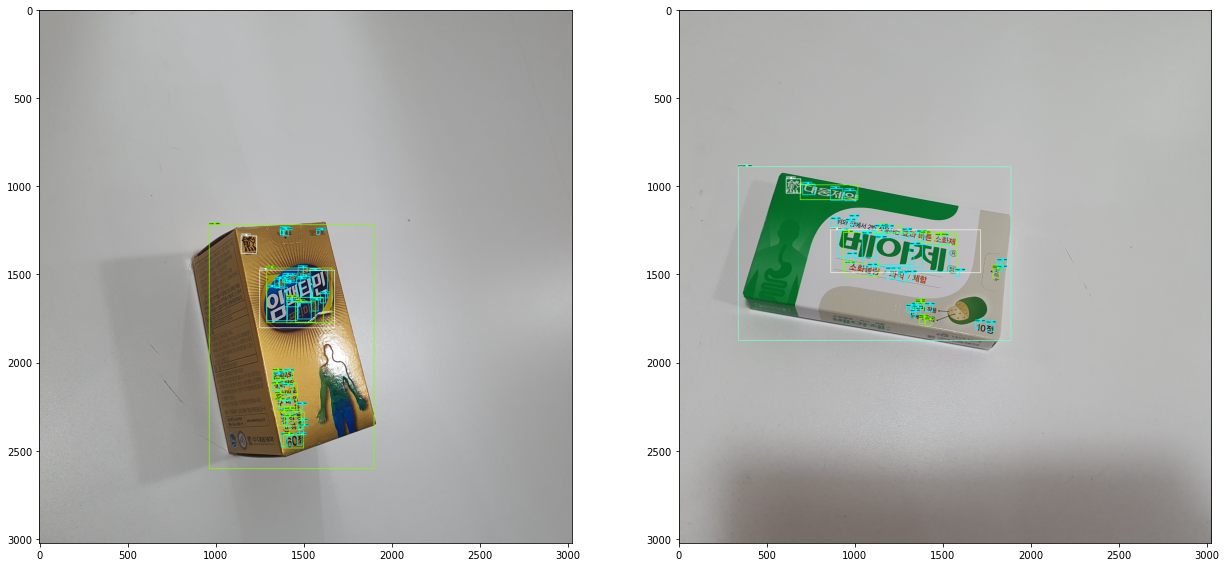

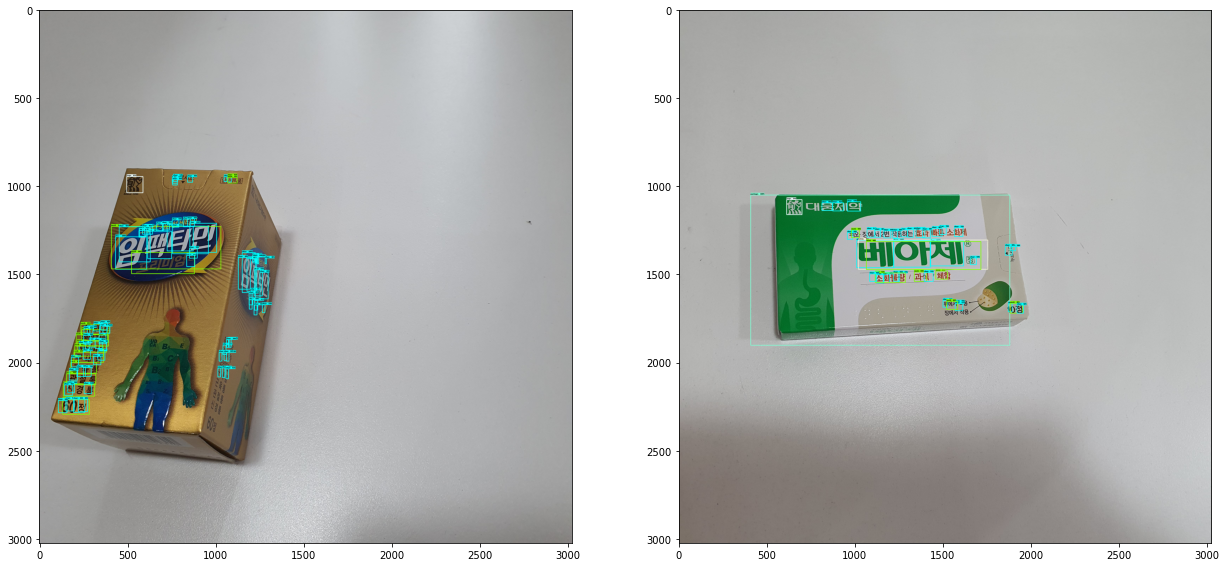

In [4]:
image_dir = 'images/'

elapsed = []
for i in range(9):
    plt.figure(figsize=(21, 42))
    for j in range(2):
#         print(f'Predicting pkrecog_00{j+1}_000{i+1}.jpg')
        image_path = os.path.join(image_dir, f'pkrecog_00{j+1}_000{i+1}.jpg')
        image_np = load_image_into_numpy_array(image_path)
        input_tensor = np.expand_dims(image_np, 0)
        start_time = time.time()
        detections = detect_fn(input_tensor)
        end_time = time.time()
        elapsed.append(end_time - start_time)
#         plt.rcParams['figure.figsize'] = [21, 42]
        label_id_offset = 1
        image_np_with_detections = image_np.copy()
        viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'][0].numpy(),
            detections['detection_classes'][0].numpy().astype(np.int32),
            detections['detection_scores'][0].numpy(),
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.40,
            agnostic_mode=False)
        plt.subplot(1, 2, j+1)
        plt.imshow(image_np_with_detections)

mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')

In [ ]:
image_dir = 'images/'

elapsed = []
for i in range(9):
    plt.figure(figsize=(21, 42))
    for j in range(2):
        print(f'Predicting pkrecog_00{j+1}_000{i+1}.jpg')
        image_path = os.path.join(image_dir, f'pkrecog_00{j+1}_000{i+1}.jpg')
        image_np = load_image_into_numpy_array(image_path)
        input_tensor = np.expand_dims(image_np, 0)
        start_time = time.time()
        detections = detect_fn(input_tensor)
        end_time = time.time()
        elapsed.append(end_time - start_time)

#         plt.rcParams['figure.figsize'] = [21, 42]
        label_id_offset = 1
        image_np_with_detections = image_np.copy()
        viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'][0].numpy(),
            detections['detection_classes'][0].numpy().astype(np.int32),
            detections['detection_scores'][0].numpy(),
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.40,
            agnostic_mode=False)
        plt.subplot(1, 2, j+1)
        plt.imshow(image_np_with_detections)

mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')

Predicting pkrecog_001_0001.jpg
Predicting pkrecog_002_0001.jpg
Predicting pkrecog_001_0002.jpg
Predicting pkrecog_002_0002.jpg
Predicting pkrecog_001_0003.jpg
Predicting pkrecog_002_0003.jpg
Predicting pkrecog_001_0004.jpg
